In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
from skimage import io
img = io.imread( "./digits.jpg", as_gray=True)

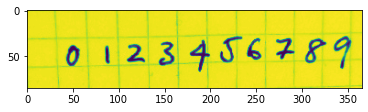

In [150]:
plt.imshow(img)

In [151]:
img.shape, img.min(), img.max()

((85, 366), 0.03529411764705883, 0.9495850980392156)

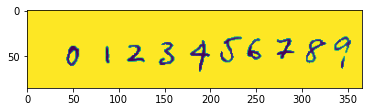

In [152]:
img[img > .5] = 1
plt.imshow(img)

# Horizontal detection

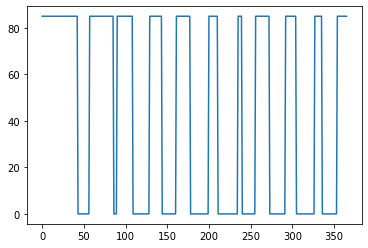

In [177]:
xx = img.sum(axis = 0)
xx[ xx < 85] = 0    
plt.plot(xx);

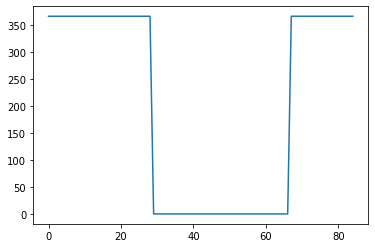

In [154]:
yy = img.sum(axis = 1)
yy[ yy < 366] = 0    
plt.plot(yy)

---

# Detect the boundaries using a convolution

http://gregoryzynda.com/python/numpy/contiguous/interval/2019/11/29/contiguous-regions.html

In [172]:
y,x = img.shape

cx = np.convolve(xx, np.array([1,1,1]), mode = 'same' )
index = np.where(cx == 2*y)[0][1:-1]
strips = index.reshape((-1,2))
strips

array([[ 42,  57],
       [ 85,  90],
       [108, 129],
       [143, 161],
       [177, 200],
       [210, 235],
       [239, 256],
       [272, 292],
       [304, 327],
       [335, 354]])

## Ten digits

In [179]:
len(strips)

10

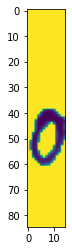

In [175]:
plt.imshow(img[:,42:57])

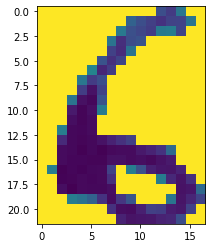

In [181]:
cleaned = []
for strip in strips:
    a,b = strip
    im = img[:,a:b]
    y,x = im.shape
    index = np.where( im.sum(axis=1) < x )[0]
    bottom, top = index.max(), index.min()
    cleaned.append(img[top:bottom,a:b])
    
plt.imshow(cleaned[6]);


In [187]:
import pickle
with open("digits.pkl", "wb") as fp:
    pickle.dump(cleaned, fp)

In [188]:
! ../.g

[master 47217e8] web
 9 files changed, 2056 insertions(+), 516 deletions(-)
 delete mode 100644 PROG/.ipynb_checkpoints/Untitled8-checkpoint.ipynb
 create mode 100644 PROG/.ipynb_checkpoints/digits-checkpoint.jpg
 create mode 100644 PROG/.ipynb_checkpoints/winequality-red-checkpoint.csv
 delete mode 100644 PROG/Untitled8.ipynb
 create mode 100644 PROG/digits.pkl
 create mode 100644 PROG/digits{}.jpg
Counting objects: 7, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (7/7), done.
Writing objects: 100% (7/7), 82.00 KiB | 3.28 MiB/s, done.
Total 7 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   9427eaf..47217e8  master -> master
